In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

In [5]:
x_train_encoded=x_train/x_train.max()

In [27]:
x_train.max()

255

In [6]:
y_encoded=tf.keras.utils.to_categorical(y_train)

2
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.06666667 0.15294118 0.52941176
  0.43137255 0.25882353 0.25882353 0.36078431 0.62352941 0.36078431
  0.00392157 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.06666667 0.2627451  0.36078431 0.36470588 0.29803922 0.34509804
  0.66666667 0.75294118 0.70588235 0.76078431 0.56078431 0.25490196
  0.3254902  0.35686275 0.23529412 0.04313725 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.07843137
  0.39607843 0.3254902  0.27058824 0.22745098 0.25490196 0.19607843
  0.10980392 0.12941176 0.14901961 0.09411765 0.08627451 0.18039216
  0.20392157 0.22745098 0.30588235 0.36470588 0.04705882 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.32156863
  0.31764706 

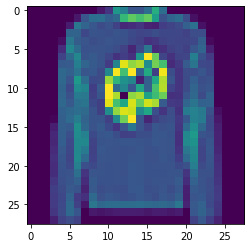

In [7]:
plt.imshow(x_train_encoded[123])
print(y_train[123])
print(x_train_encoded[123])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 50)                39250     
                                                                 
 dense_44 (Dense)            (None, 50)                2550      
                                                                 
 dense_45 (Dense)            (None, 50)                2550      
                                                                 
 dense_46 (Dense)            (None, 10)                510       
                                                                 
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [===========================

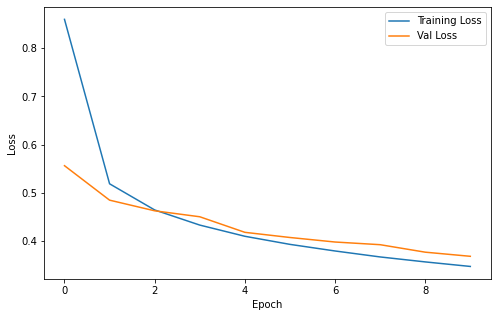

In [31]:
del model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
model.summary()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['acc'])
model_history=model.fit(x_train_encoded,y_encoded,batch_size=32,epochs=10,validation_split=0.2)

plt.figure(figsize=(8, 5))
plt.plot(model_history.history.get("loss"), label="Training Loss")
plt.plot(model_history.history.get("val_loss"), label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

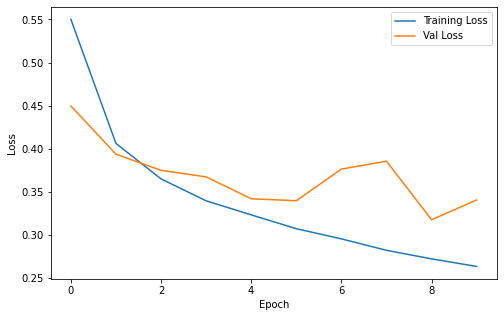